<a href="https://colab.research.google.com/github/karlopehar1/racunalni-vid/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf lab4 && git clone https://github.com/SUMMostar/lab4-karlopehar1.git
!cp -a lab4/. .



Cloning into 'lab4-karlopehar1'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 15 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 3.35 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (1/1), done.
cp: cannot stat 'lab4/.': No such file or directory


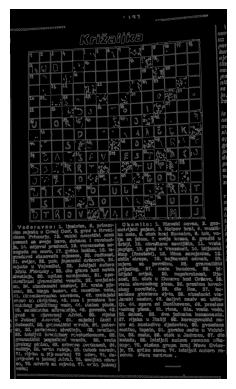

In [7]:
### 1. zadatak
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('lab4-karlopehar1/images/crossword.jpg', cv.IMREAD_GRAYSCALE)
blurred = cv.GaussianBlur(img, (5,5), 1.5)
edges = cv.Canny(blurred, 100, 200)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


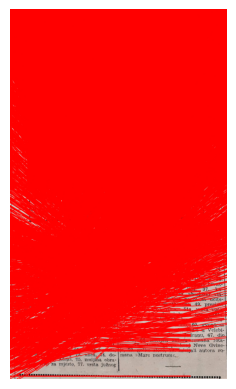

In [8]:
### 2. zadatak
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

img = cv.imread('lab4-karlopehar1/images/crossword.jpg', cv.IMREAD_GRAYSCALE)
img_color = cv.imread('lab4-karlopehar1/images/crossword.jpg')

blurred = cv.GaussianBlur(img, (5,5), 1.5)
edges = cv.Canny(blurred, 100, 200)

def draw_lines(img, lines):
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0, y0 = a*rho, b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img, pt1, pt2, (0,0,255), 2, cv.LINE_AA)
    return img

lines = cv.HoughLines(edges, 1, math.pi/90, 200, np.array([]), 0, 0)
img_lines = draw_lines(img_color.copy(), lines)

plt.imshow(cv.cvtColor(img_lines, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


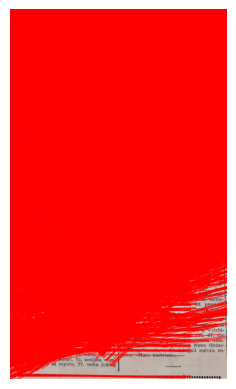

In [9]:
### 3. zadatak
lines2 = cv.HoughLines(edges, 1, math.pi/180, 200, np.array([]), 0, 0)
img_lines2 = draw_lines(img_color.copy(), lines2)

plt.imshow(cv.cvtColor(img_lines2, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


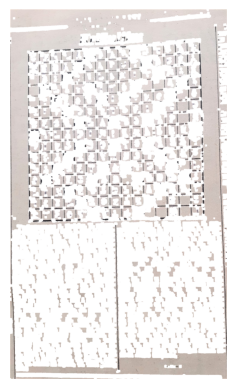

In [10]:
### 4. zadatak
corners = cv.cornerHarris(img, blockSize=15, ksize=3, k=0.05)
img_corners = img_color.copy()
img_corners[corners > 0.0001 * corners.max()] = 255

plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


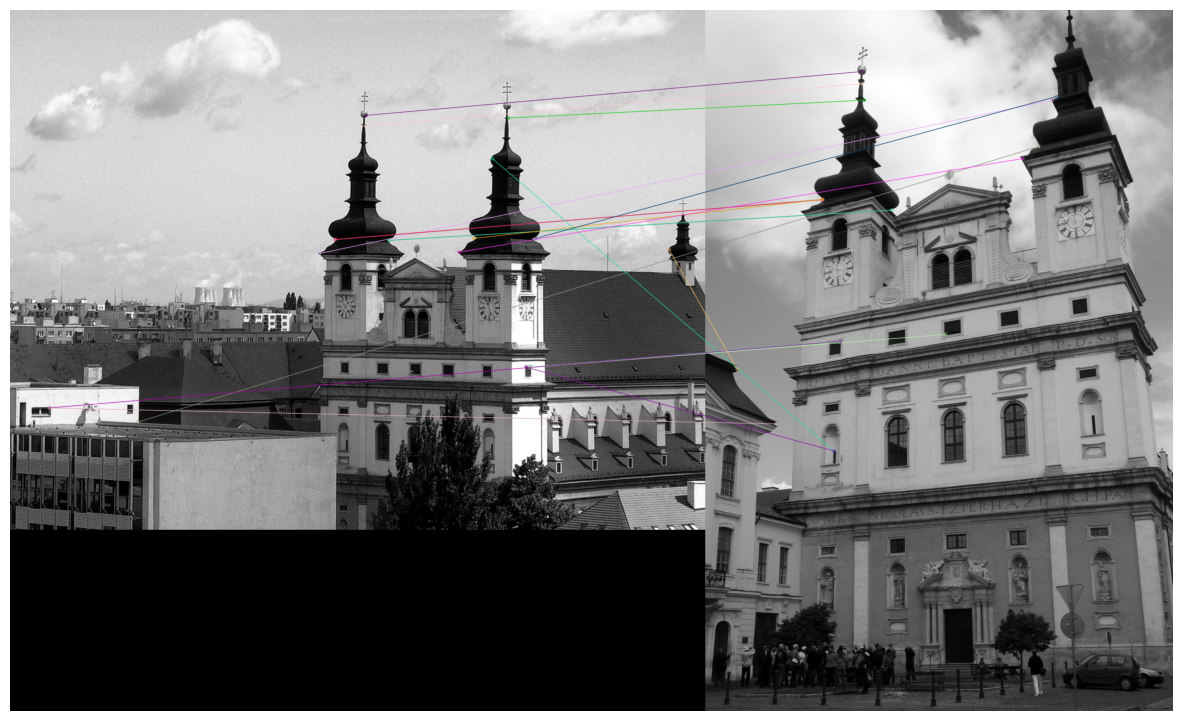

In [11]:
### 5. zadatak
orb = cv.ORB_create()

img1 = cv.imread('lab4-karlopehar1/images/building_1.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('lab4-karlopehar1/images/building_2.jpg', cv.IMREAD_GRAYSCALE)

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)

plt.figure(figsize=(15,10))
plt.imshow(img_matches)
plt.axis('off')
plt.show()


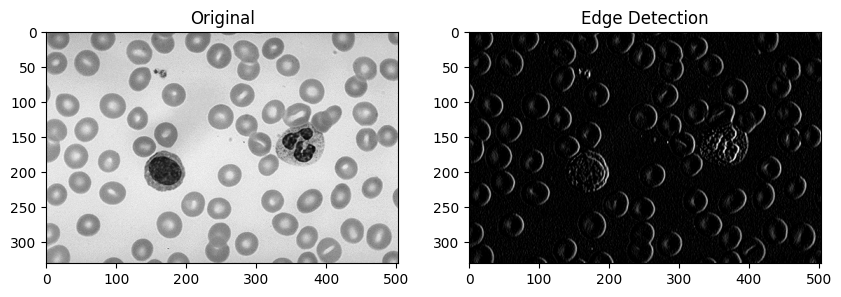

In [16]:
### 6. zadatak
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('lab4-karlopehar1/images/cells.jpg', cv.IMREAD_GRAYSCALE)

kernel_edge = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])


img_edges = cv.filter2D(img, -1, kernel_edge)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(img_edges, cmap='gray')
plt.title('Edge Detection')
plt.show()
